<a href="https://colab.research.google.com/github/richamudi/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TASK NO. 02
# Perform data cleaning and exploratory data analysis (EDA) on Ttanic dataset

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading Dataset**

In [2]:
titanic= pd.read_excel('/content/drive/MyDrive/Interships/Prodigy intern/Titanic.xlsx')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Cleaning**

In [3]:
# Let's start by checking the missing values in the dataset
print(titanic.isnull().sum())

# Fill missing values for 'Age' with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns that won't contribute to the analysis
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**EDA process and identifying patterns and trends in the data**

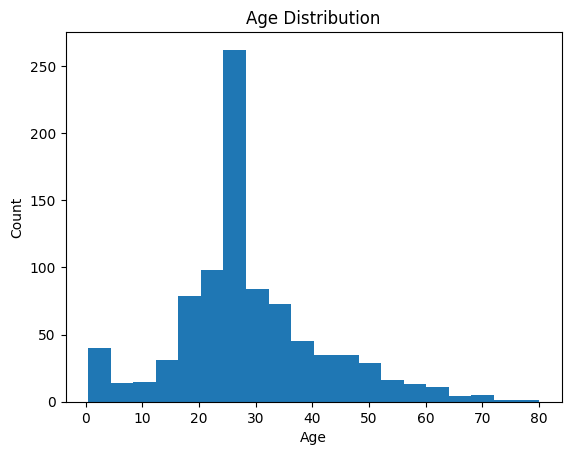

In [4]:
# Exploring the age distribution of passengers
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

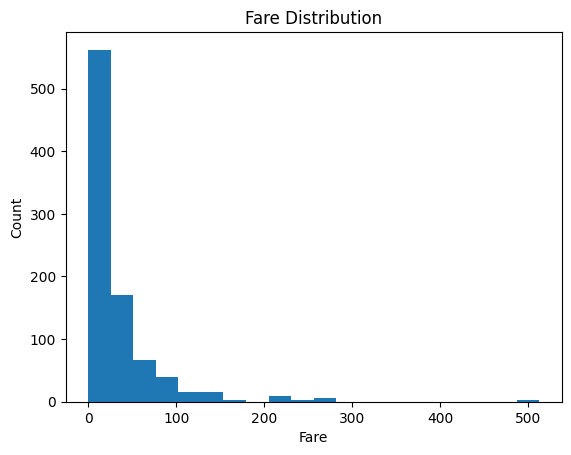

In [5]:
# Explorinng the fare distribution of passengers
plt.hist(titanic['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [6]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = titanic.groupby('Sex')['Survived'].mean()*100
print(f"Survival Rate by Sex:\n{sex_survived}")

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


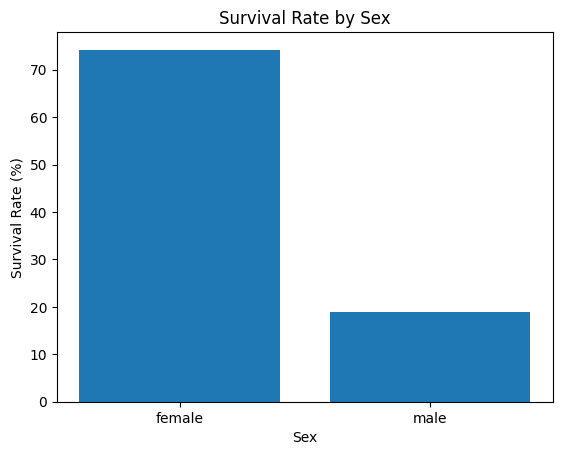

In [7]:
# Visualizing the relationship between 'Sex' and 'Survived'
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

In [11]:
# Exploring the relationship between 'Pclass' and 'Survived'
pclass_survived = titanic.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")

Survival Rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


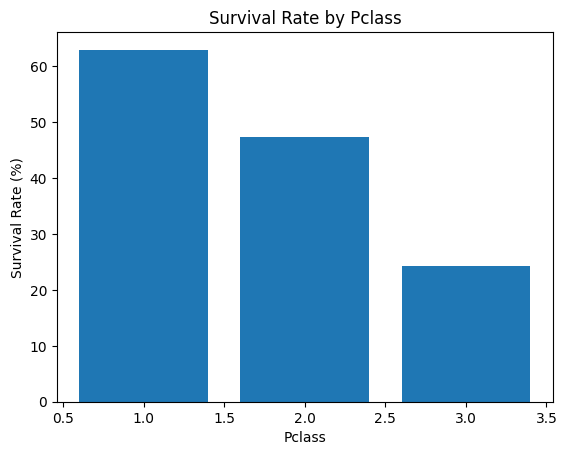

In [12]:
# Visualizing the relationship between 'Pclass' and 'Survived'
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

<ipython-input-13-86e3ccf74c55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=titanic,palette='Greens')


<Axes: xlabel='Survived', ylabel='count'>

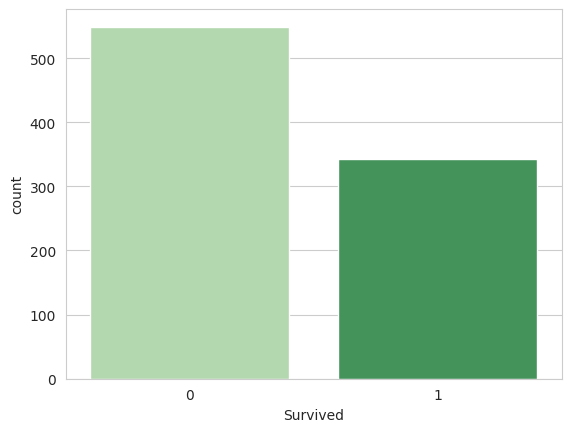

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='Greens')

<Axes: xlabel='Survived', ylabel='count'>

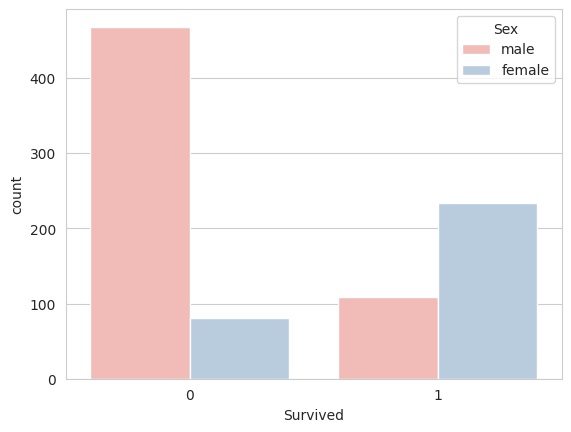

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Pastel1')

<Axes: xlabel='Survived', ylabel='count'>

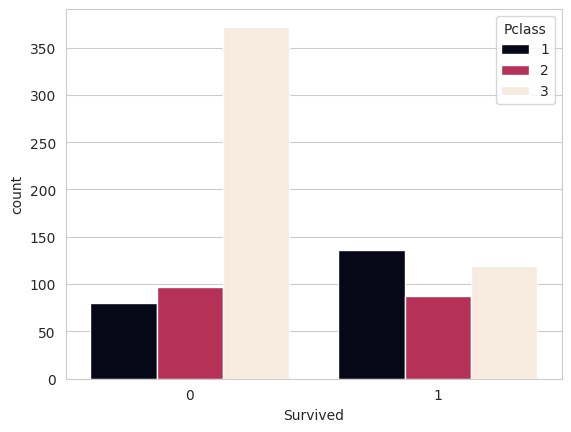

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rocket')

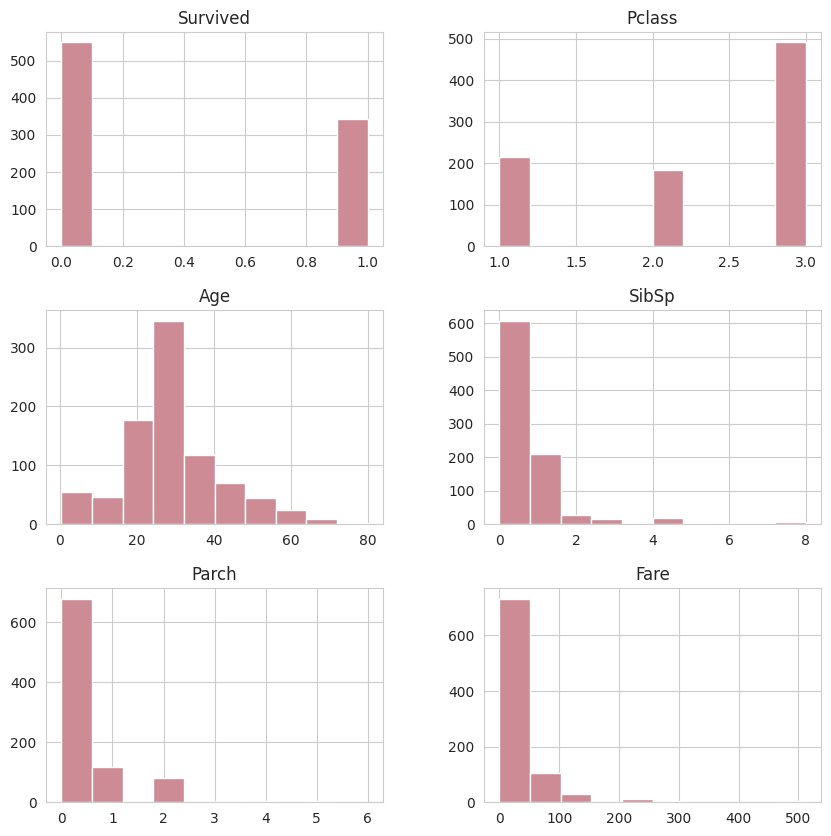

In [16]:
titanic.hist(figsize=(10,10),color='#CD8C95')
plt.show()

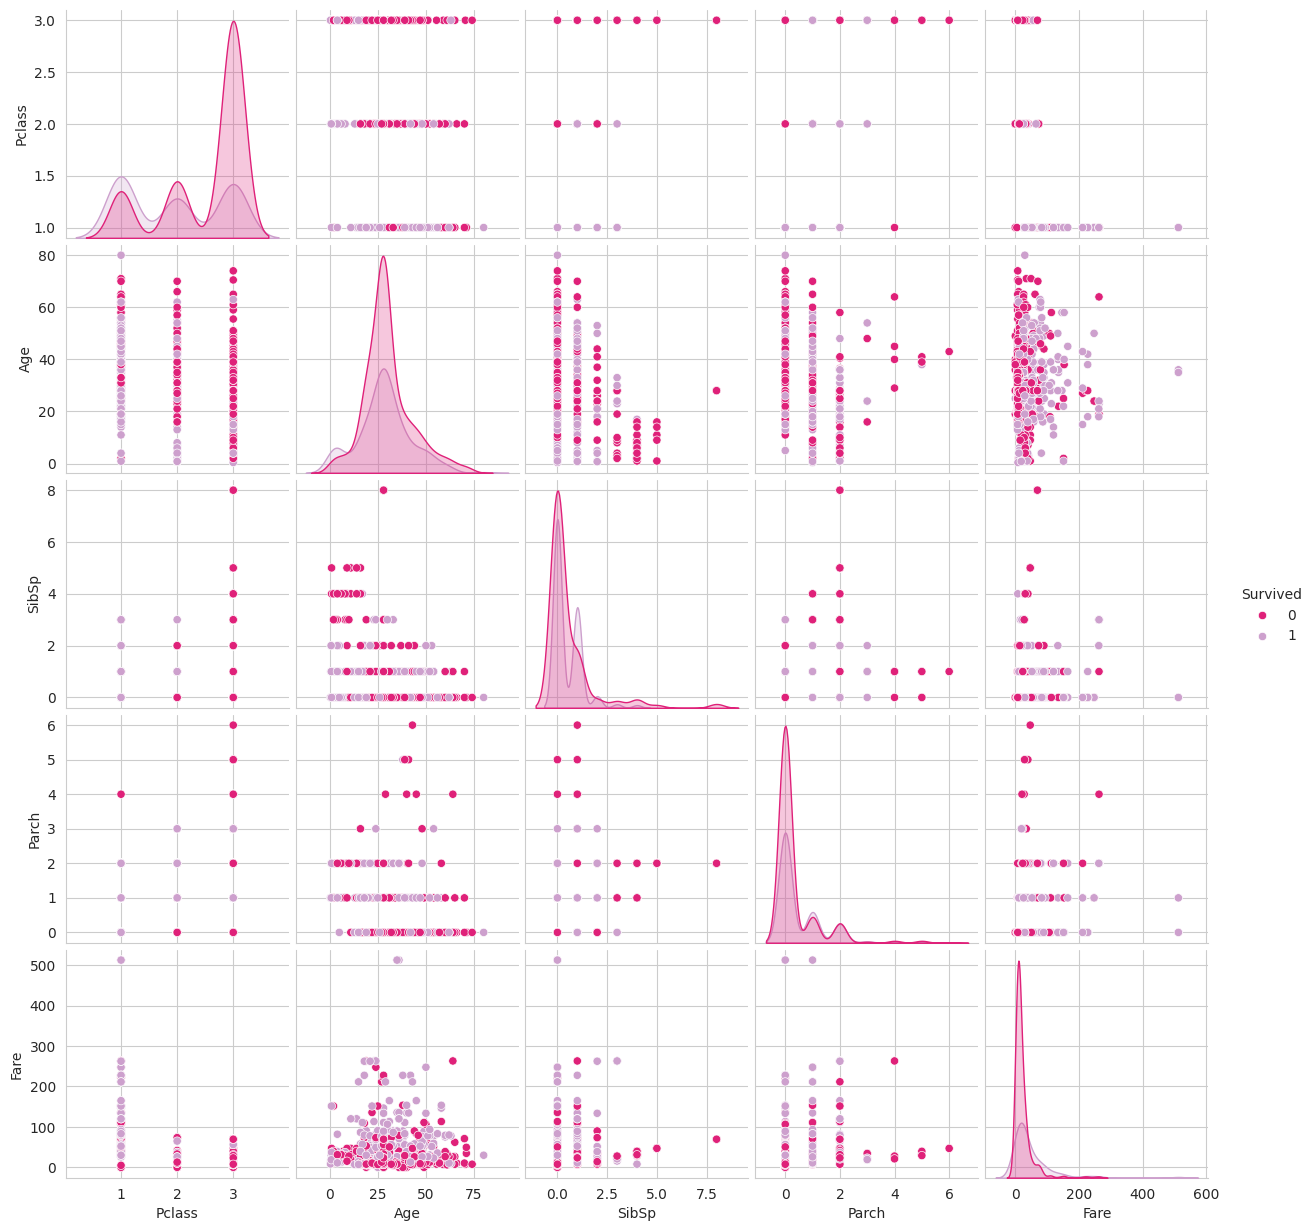

In [17]:
sns.pairplot(titanic,hue='Survived',palette='PuRd_r')
plt.show()

<ipython-input-18-d39972a6e150>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),annot=True,cmap='PuBu')


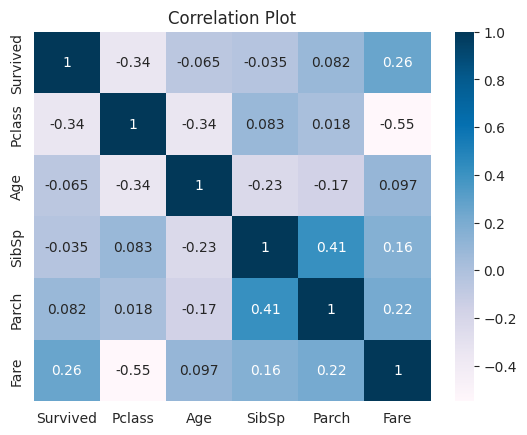

In [18]:
sns.heatmap(titanic.corr(),annot=True,cmap='PuBu')
plt.title('Correlation Plot')
plt.show()